In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [64]:
df = pd.read_csv('train.csv')
housingDataset, housingDataset_test = train_test_split(df, train_size=0.7)

In [65]:
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [66]:
housingDataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
253,254,80,RL,85.0,9350,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,7,1964,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,108.0,TA,TA,CBlock,Gd,TA,Gd,LwQ,270,ALQ,580,452,1302,GasA,Ex,Y,SBrkr,1302,0,0,1302,0,1,2,0,3,1,Gd,7,Min1,0,NaN,Attchd,1964.0,RFn,1,309,TA,TA,Y,333,0,0,0,0,0,NaN,MnPrv,NaN,0,10,2007,CWD,Normal,158000
123,124,120,RL,55.0,7892,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,6,5,1993,1993,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300,Unf,0,899,1199,GasA,Ex,Y,SBrkr,1199,0,0,1199,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1993.0,RFn,2,530,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,153900
507,508,20,FV,75.0,7862,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,27,Unf,0,1191,1218,GasA,Ex,Y,SBrkr,1218,0,0,1218,0,0,2,0,2,1,Gd,4,Typ,0,NaN,Attchd,2009.0,Fin,2,676,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,9,2009,New,Partial,208300
1012,1013,70,RL,55.0,10592,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,7,1923,1996,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,Fa,No,Unf,0,Unf,0,602,602,GasA,TA,Y,SBrkr,900,602,0,1502,0,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1923.0,Unf,1,180,TA,TA,Y,96,0,112,0,53,0,NaN,NaN,NaN,0,8,2007,WD,Normal,165000
164,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,7,1926,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,TA,Mn,LwQ,370,Unf,0,779,1149,GasA,Gd,Y,FuseA,1149,467,0,1616,0,0,2,0,3,1,Gd,5,Typ,0,NaN,Detchd,1926.0,Unf,1,216,TA,TA,Y,0,0,183,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,152000


count      1021.000000
mean     180088.367287
std       77476.673080
min       37900.000000
25%      129000.000000
50%      164990.000000
75%      214500.000000
max      755000.000000
Name: SalePrice, dtype: float64


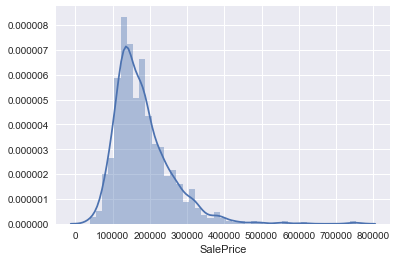

In [67]:
print(housingDataset.SalePrice.describe())

sns.distplot(housingDataset.SalePrice)

SalePrice       1.000000
OverallQual     0.800244
GrLivArea       0.717845
TotalBsmtSF     0.642017
GarageCars      0.641218
1stFlrSF        0.640459
GarageArea      0.626538
FullBath        0.548713
YearRemodAdd    0.520252
TotRmsAbvGrd    0.517925
Name: SalePrice, dtype: float64


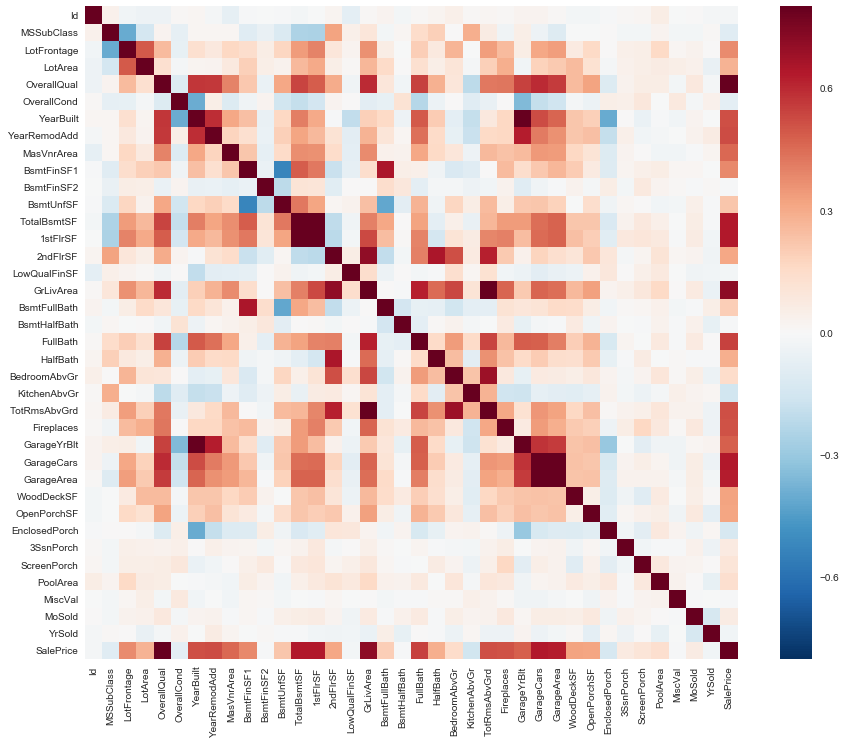

In [68]:
corrmat = housingDataset.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=0.8,square=True)

#most important features
n = 10
cols = corrmat.nlargest(n, 'SalePrice').SalePrice
print(cols)

In [69]:
#check for missing values
print('Missing Values for top n Features')

for feature in cols.index.values:
    print('Missing Values for Feature: ',feature,' Number: ',housingDataset[feature].isnull().sum())

Missing Values for top n Features
Missing Values for Feature:  SalePrice  Number:  0
Missing Values for Feature:  OverallQual  Number:  0
Missing Values for Feature:  GrLivArea  Number:  0
Missing Values for Feature:  TotalBsmtSF  Number:  0
Missing Values for Feature:  GarageCars  Number:  0
Missing Values for Feature:  1stFlrSF  Number:  0
Missing Values for Feature:  GarageArea  Number:  0
Missing Values for Feature:  FullBath  Number:  0
Missing Values for Feature:  YearRemodAdd  Number:  0
Missing Values for Feature:  TotRmsAbvGrd  Number:  0


In [70]:
for feature in cols.index.values:
    print(feature, ': \n',housingDataset[feature].describe(), '\n')

SalePrice : 
 count      1021.000000
mean     180088.367287
std       77476.673080
min       37900.000000
25%      129000.000000
50%      164990.000000
75%      214500.000000
max      755000.000000
Name: SalePrice, dtype: float64 

OverallQual : 
 count    1021.000000
mean        6.085211
std         1.375410
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64 

GrLivArea : 
 count    1021.000000
mean     1507.226249
std       512.512960
min       334.000000
25%      1130.000000
50%      1456.000000
75%      1779.000000
max      4676.000000
Name: GrLivArea, dtype: float64 

TotalBsmtSF : 
 count    1021.000000
mean     1056.345739
std       414.578651
min         0.000000
25%       800.000000
50%      1002.000000
75%      1291.000000
max      3206.000000
Name: TotalBsmtSF, dtype: float64 

GarageCars : 
 count    1021.000000
mean        1.774731
std         0.731764
min         0.000000
25%         1

Feature:  SalePrice
Original Data


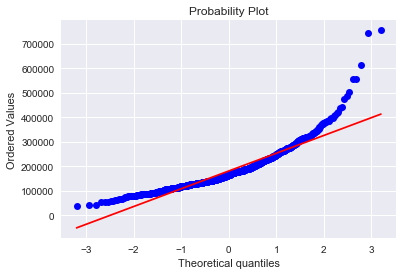

LogTransformed


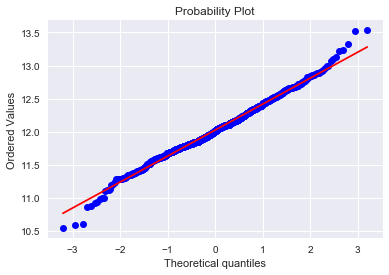

Feature:  OverallQual
Original Data


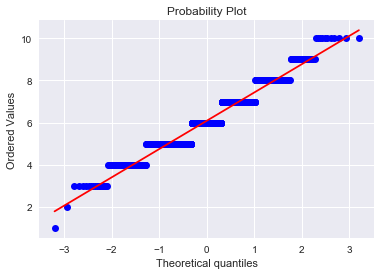

LogTransformed


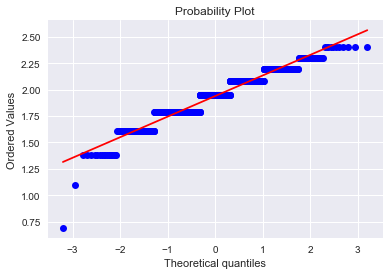

Feature:  GrLivArea
Original Data


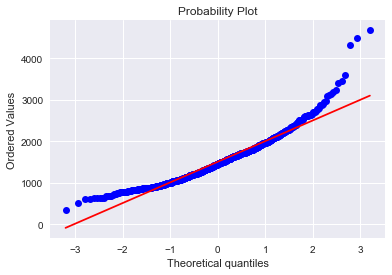

LogTransformed


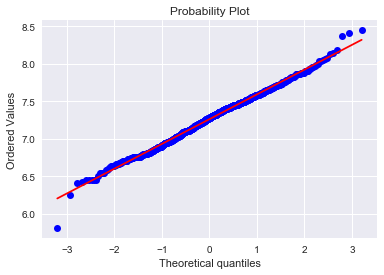

Feature:  TotalBsmtSF
Original Data


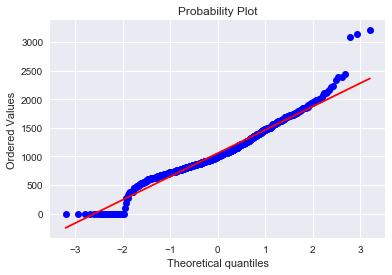

LogTransformed


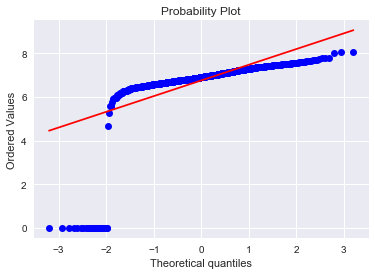

Feature:  GarageCars
Original Data


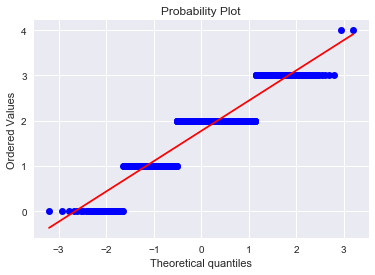

LogTransformed


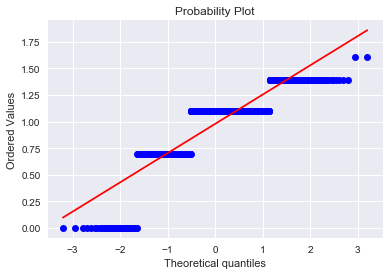

Feature:  1stFlrSF
Original Data


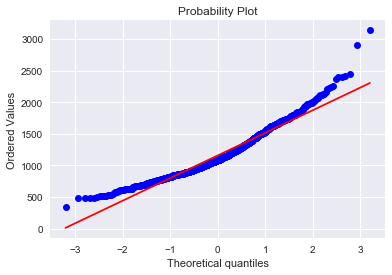

LogTransformed


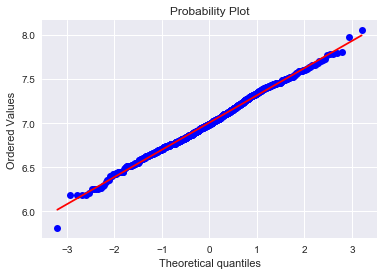

Feature:  GarageArea
Original Data


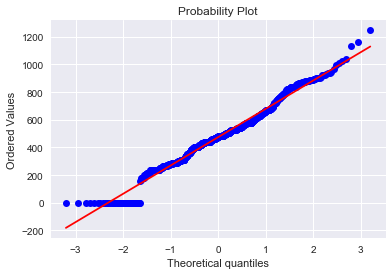

LogTransformed


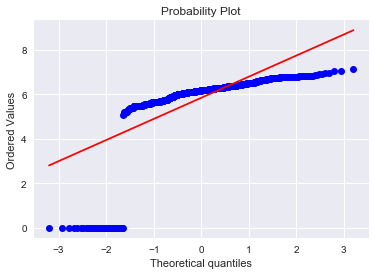

Feature:  FullBath
Original Data


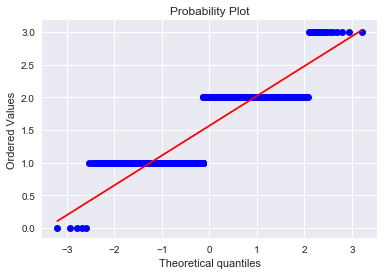

LogTransformed


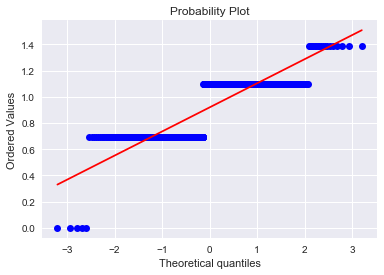

Feature:  YearRemodAdd
Original Data


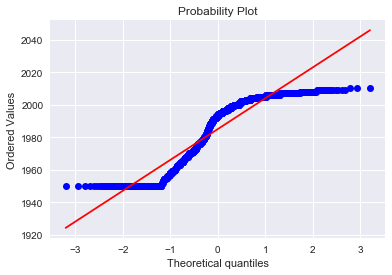

LogTransformed


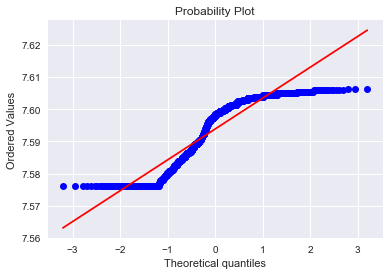

Feature:  TotRmsAbvGrd
Original Data


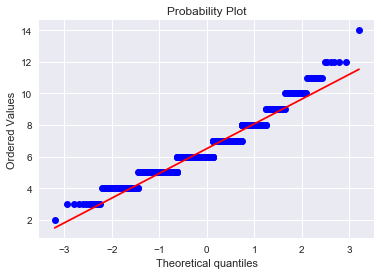

LogTransformed


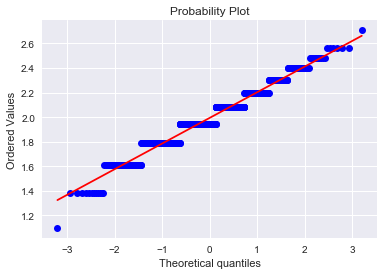

In [71]:
for feature in cols.index.values:
    print("Feature: ", feature)

    print("Original Data")
    fig = plt.figure()
    res = stats.probplot(housingDataset[feature], plot=plt)
    plt.show()

    print("LogTransformed")
    fig = plt.figure()
    res = stats.probplot(np.log1p(housingDataset[feature]), plot=plt)
    plt.show()

In [72]:
#Checking Models

featureColumns = cols.index.values.tolist()
featureColumns.remove('SalePrice')

print('Features: ',featureColumns)

Features:  ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd']


In [88]:
#Models
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [74]:
X_train = housingDataset[featureColumns]
y_train = housingDataset.SalePrice

X_test = housingDataset_test[featureColumns]
y_test = housingDataset_test.SalePrice

In [86]:
reg_svr = SVR()
reg_svr.fit(X_train,y_train)

reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,y_train)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train, y_train)

print('Score: SVR ', reg_svr.score(X_test,y_test))
print('Score: Lin ', reg_linear.score(X_test,y_test))
print('Score: ENet ', ENet.score(X_test,y_test))
print('Score: Lasso ', lasso.score(X_test,y_test))

Score: SVR  -0.045463086268
Score: Lin  0.682308186257
Score: ENet  0.682322626397
Score: Lasso  0.682308196359


In [89]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [95]:
averaged_models = AveragingModels(models=(reg_svr, reg_linear, ENet, lasso))
averaged_models.fit(X_train, y_train)
averaged_models.score(X_test, y_test)

0.66239152080199748